In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset
data = pd.read_csv("heart.csv")
data.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
357,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
990,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
240,54,0,1,132,288,1,0,159,1,0.0,2,1,2,1


In [3]:
# 3Explore Data
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.0

In [4]:
data["target"].value_counts()

target
1    526
0    499
Name: count, dtype: int64

In [5]:
corr_matrix = data.corr()

In [6]:
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.103240,-0.071966,0.271121,0.219823,0.121243,-0.132696,-0.390227,0.088163,0.208137,-0.169105,0.271551,0.072297,-0.229324
sex,-0.103240,1.000000,-0.041119,-0.078974,-0.198258,0.027200,-0.055117,-0.049365,0.139157,0.084687,-0.026666,0.111729,0.198424,-0.279501
cp,-0.071966,-0.041119,1.000000,0.038177,-0.081641,0.079294,0.043581,0.306839,-0.401513,-0.174733,0.131633,-0.176206,-0.163341,0.434854
trestbps,0.271121,-0.078974,0.038177,1.000000,0.127977,0.181767,-0.123794,-0.039264,0.061197,0.187434,-0.120445,0.104554,0.059276,-0.138772
chol,0.219823,-0.198258,-0.081641,0.127977,1.000000,0.026917,-0.147410,-0.021772,0.067382,0.064880,-0.014248,0.074259,0.100244,-0.099966
fbs,0.121243,0.027200,0.079294,0.181767,0.026917,1.000000,-0.104051,-0.008866,0.049261,0.010859,-0.061902,0.137156,-0.042177,-0.041164
restecg,-0.132696,-0.055117,0.043581,-0.123794,-0.147410,-0.104051,1.000000,0.048411,-0.065606,-0.050114,0.086086,-0.078072,-0.020504,0.134468
thalach,-0.390227,-0.049365,0.306839,-0.039264,-0.021772,-0.008866,0.048411,1.000000,-0.380281,-0.349796,0.395308,-0.207888,-0.098068,0.422895
exang,0.088163,0.139157,-0.401513,0.061197,0.067382,0.049261,-0.065606,-0.380281,1.000000,0.310844,-0.267335,0.107849,0.197201,-0.438029
oldpeak,0.208137,0.084687,-0.174733,0.187434,0.064880,0.010859,-0.050114,-0.349796,0.310844,1.000000,-0.575189,0.221816,0.202672,-0.438441


<Axes: >

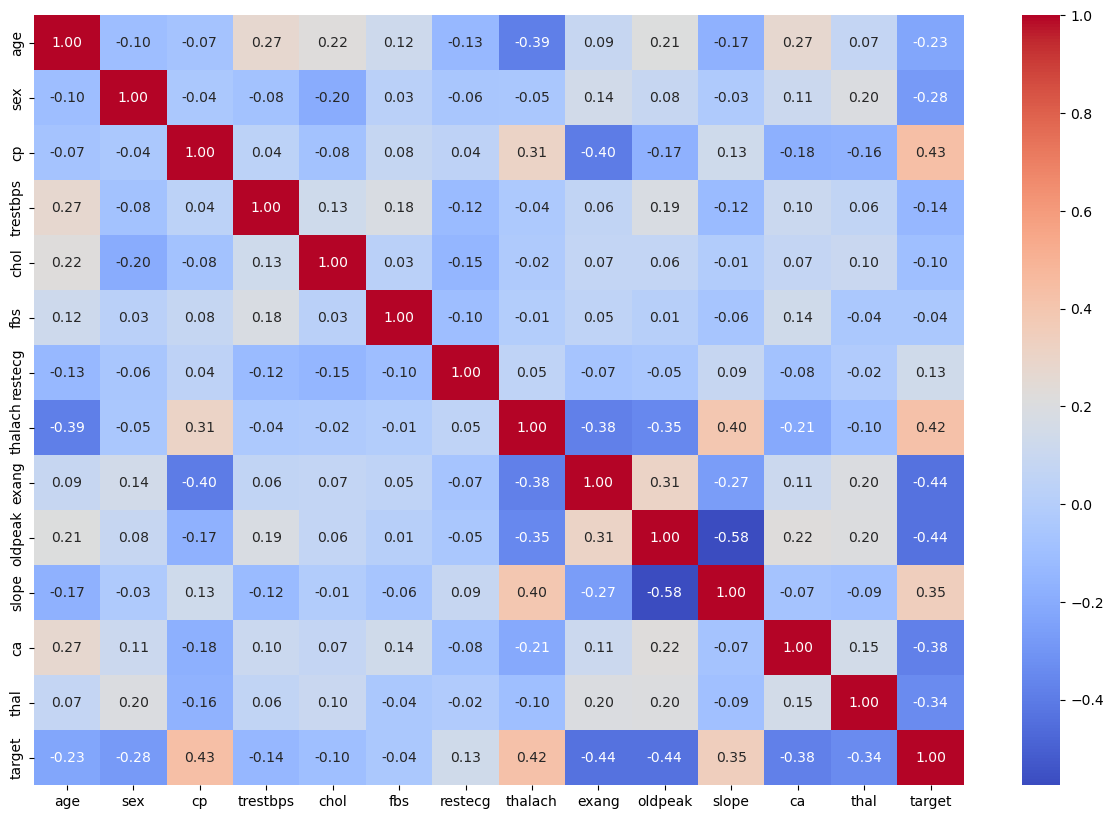

In [7]:
# Ploting heatmap on corr_matrix 
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix,annot=True,fmt=".2f",cmap="coolwarm")

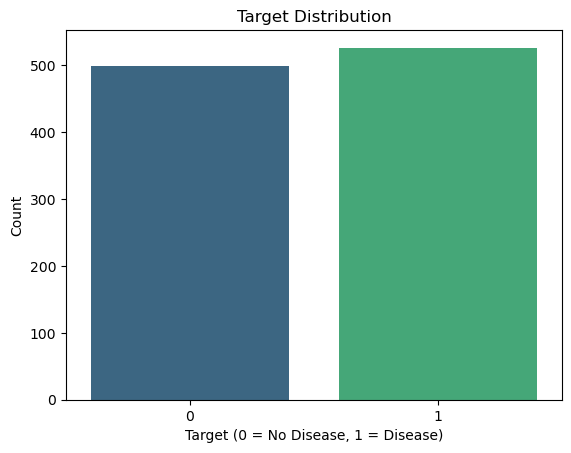

In [8]:
# Count plot for target variable
sns.countplot(x="target", data=data, palette="viridis")
plt.title("Target Distribution")
plt.xlabel("Target (0 = No Disease, 1 = Disease)")
plt.ylabel("Count")
plt.show()

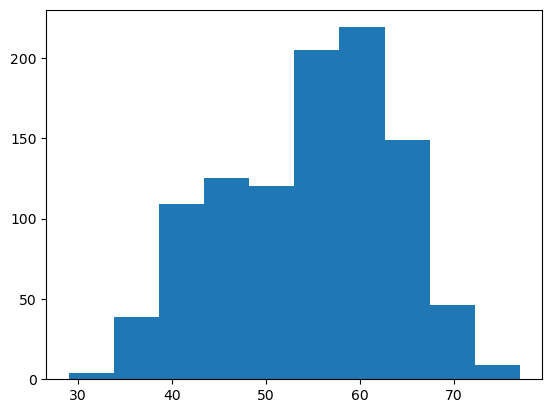

In [9]:
#hist plot in age col
plt.hist(data["age"],bins=10)
plt.show()

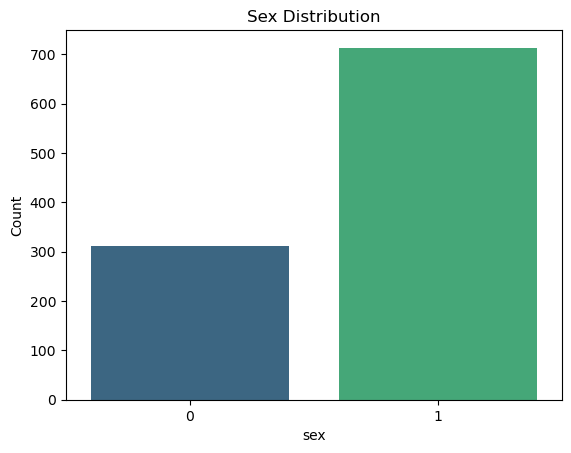

In [10]:
# Count plot for target variable
sns.countplot(x="sex", data=data, palette="viridis")
plt.title("Sex Distribution")
plt.ylabel("Count")
plt.show()

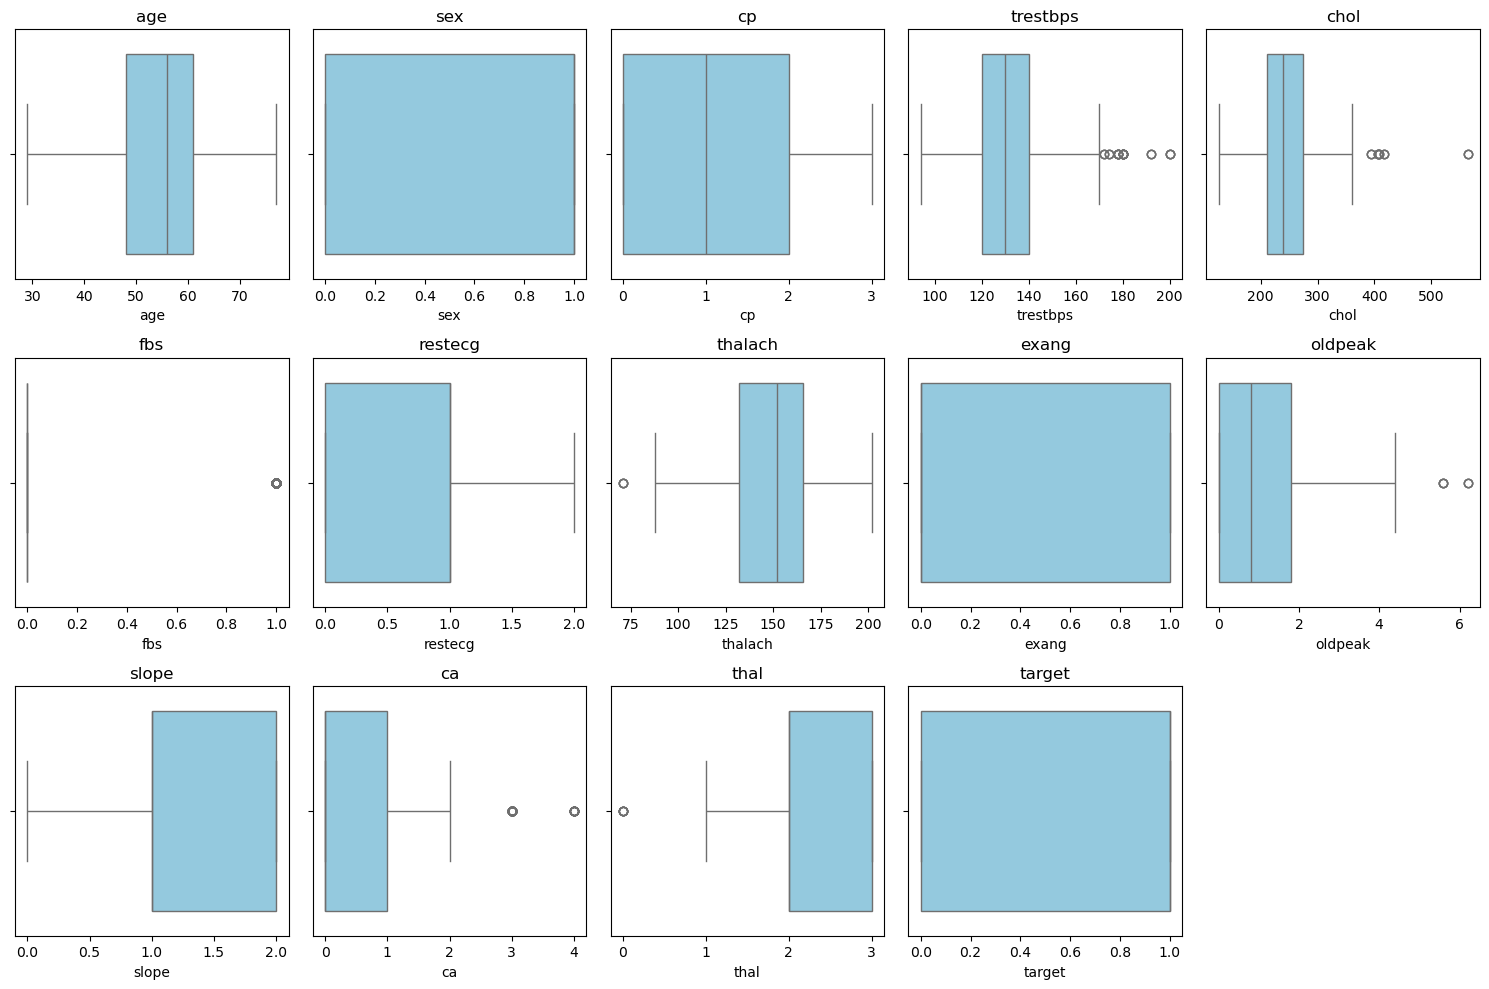

In [11]:
# Checking outliers only for numerical columns
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 5, i)  # 3 rows, 5 columns of plots
    sns.boxplot(x=data[col], color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
# Checking skw only for numerical columns
numeric_cols = data.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 5, i)  # 3 rows, 5 columns of plots
    sns.histplot(x=data[col],kde = True, color="skyblue")
    plt.title(col)
plt.tight_layout()
plt.show()


In [ ]:
selected_cols = ["age", "trestbps", "chol", "thalach", "oldpeak", "target"] # Importance col

# Pair plot
sns.pairplot(data[selected_cols], hue="target", diag_kind="kde", palette="husl")
plt.suptitle("Pairplot of Selected Features vs Target", y=1.02)
plt.show()


In [ ]:
def iqr_range(col):
    # Calculate the first and third quartiles of the column
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    
    # Compute the Interquartile Range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for detecting outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values below the lower bound and above the upper bound
    # Values below are set to lower_bound, above are set to upper_bound
    data[col] = np.where(
        data[col] < lower_bound, lower_bound,
        np.where(data[col] > upper_bound, upper_bound, data[col])
    )

In [ ]:
iqr_range("chol")

sns.boxplot(data["chol"])

In [ ]:
iqr_range("trestbps")
sns.boxplot(data["trestbps"])

In [ ]:
x = data.drop(["target"],axis=1)
y = data.iloc[:,-1]

In [ ]:
# splitting 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
# Decision Tree - Default
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
y_pred = tree.predict(x_test)
print("\nDecision Tree (Default) Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree (Default) CV Accuracy:", np.mean(cross_val_score(tree, x_train, y_train, cv=10)))
print(classification_report(y_test, y_pred))

In [ ]:
#Decision Tree - Pruned
tree1 = DecisionTreeClassifier(
    max_depth=4,                # limit depth
    min_samples_split=5,        # minimum samples to split
    min_samples_leaf=2,         # minimum samples in leaf node
    random_state=42
)


In [ ]:
tree1.fit(x_train,y_train)
y_pred = tree1.predict(x_test)

In [ ]:
print("\nDecision Tree (Pruned) Accuracy:", accuracy_score(y_test, y_pred))
print("Decision Tree (Pruned) CV Accuracy:", np.mean(cross_val_score(tree1, x_train, y_train, cv=10)))
print(classification_report(y_test, y_pred))

In [ ]:
# Plot pruned tree
plot_tree(tree1)
plt.show()

In [ ]:
#  Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
# Predictions
y_pred_rf = rf.predict(x_test)

In [ ]:
print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest CV Accuracy:", np.mean(cross_val_score(rf, x_train, y_train, cv=10)))
print(classification_report(y_test, y_pred_rf))

In [ ]:
# Feature importance plot
feat_importances = pd.Series(rf.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Feature Importances (Random Forest)")
plt.show()


In [ ]:
# Model Comparison
results = pd.DataFrame({
    "Model": ["Decision Tree (default)", "Decision Tree (pruned)", "Random Forest"],
    "Test Accuracy": [accuracy_score(y_test, tree.predict(x_test)),
                      accuracy_score(y_test, tree1.predict(x_test)),
                      accuracy_score(y_test, rf.predict(x_test))],
    "CV Accuracy": [np.mean(cross_val_score(tree, x_train, y_train, cv=10)),
                    np.mean(cross_val_score(tree1, x_train, y_train, cv=10)),
                    np.mean(cross_val_score(rf, x_train, y_train, cv=10))]
})

In [ ]:
print("\nFinal Model Comparison:")
results

In [ ]:
# Model comparison heatmap
results_numeric = results.set_index("Model")

plt.figure(figsize=(6, 4))
sns.heatmap(results_numeric, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Model Performance Comparison")
plt.show()
